<a href="https://www.kaggle.com/code/hadikp/titanic-survival-prediction?scriptVersionId=257670405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

os.listdir("/kaggle/input/titanic/")


['train.csv', 'test.csv', 'gender_submission.csv']

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")



In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
x_train_1 = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
# x_train_1 = x_train_1.dropna()
print(x_train_1)




     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0         3    male  22.0      1      0   7.2500        S         0
1         1  female  38.0      1      0  71.2833        C         1
2         3  female  26.0      0      0   7.9250        S         1
3         1  female  35.0      1      0  53.1000        S         1
4         3    male  35.0      0      0   8.0500        S         0
..      ...     ...   ...    ...    ...      ...      ...       ...
886       2    male  27.0      0      0  13.0000        S         0
887       1  female  19.0      0      0  30.0000        S         1
888       3  female   NaN      1      2  23.4500        S         0
889       1    male  26.0      0      0  30.0000        C         1
890       3    male  32.0      0      0   7.7500        Q         0

[891 rows x 8 columns]


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [9]:
x_train_1['FamilySize'] = x_train_1['SibSp'] + x_train_1['Parch'] + 1
x_train_1['IsAlone'] = (x_train_1['FamilySize'] == 1).astype(int)
x_train_1['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


/tmp/ipykernel_13/999256726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_1['FamilySize'] = x_train_1['SibSp'] + x_train_1['Parch'] + 1
/tmp/ipykernel_13/999256726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_1['IsAlone'] = (x_train_1['FamilySize'] == 1).astype(int)
/tmp/ipykernel_13/999256726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [10]:
y_train = x_train_1['Survived']
x_train = x_train_1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone','Title']]

print(x_train)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         3    male  22.0      1      0   7.2500        S           2   
1         1  female  38.0      1      0  71.2833        C           2   
2         3  female  26.0      0      0   7.9250        S           1   
3         1  female  35.0      1      0  53.1000        S           2   
4         3    male  35.0      0      0   8.0500        S           1   
..      ...     ...   ...    ...    ...      ...      ...         ...   
886       2    male  27.0      0      0  13.0000        S           1   
887       1  female  19.0      0      0  30.0000        S           1   
888       3  female   NaN      1      2  23.4500        S           4   
889       1    male  26.0      0      0  30.0000        C           1   
890       3    male  32.0      0      0   7.7500        Q           1   

     IsAlone Title  
0          0    Mr  
1          0   Mrs  
2          1  Miss  
3          0   Mrs  
4          1    Mr

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'Title'],
      dtype='object')


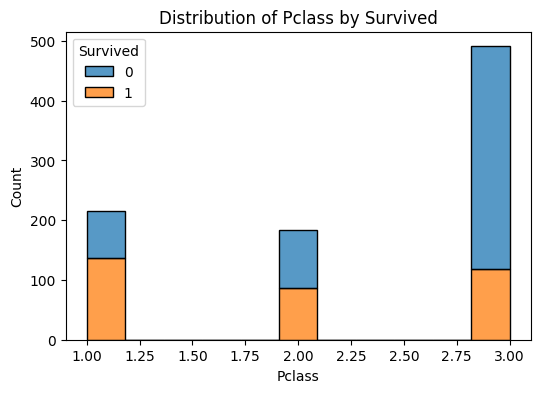

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

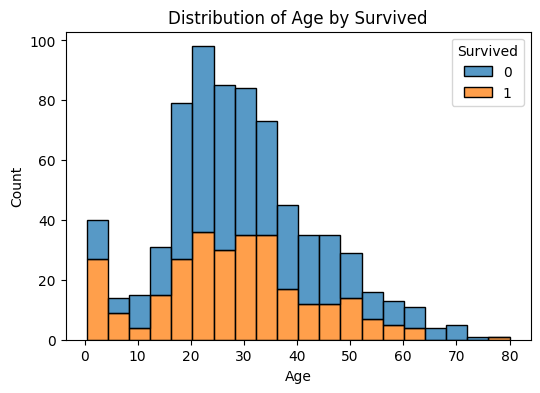

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

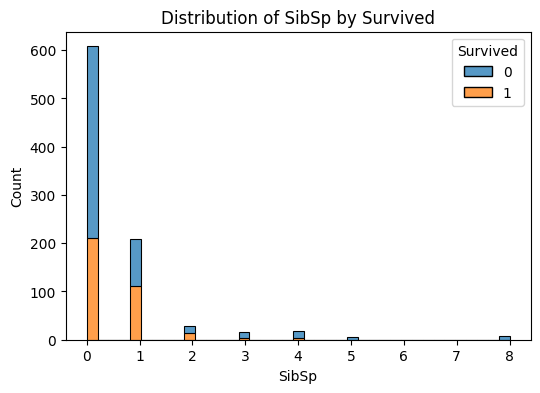

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

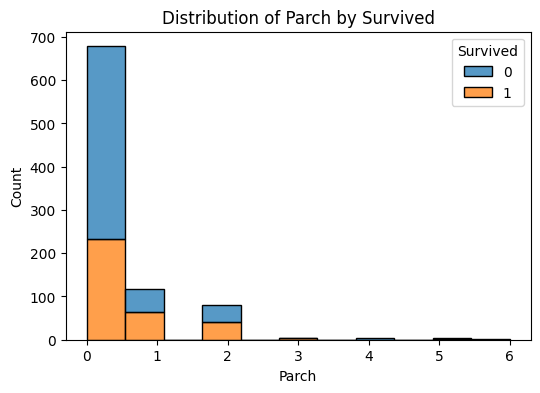

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

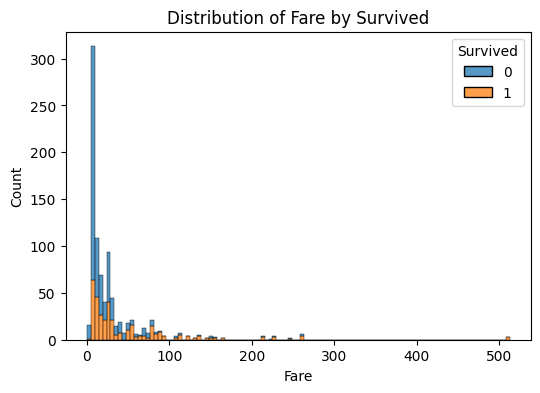

In [11]:
print(x_train.columns)

for i in x_train.columns:
    if i not in ['Survived','FamilySize', 'IsAlone', 'Title'] and x_train[i].dtype in ['int64', 'float64']:  # only for numeric columns
        plt.figure(figsize=(6, 4))
        sns.histplot(data=train, x=i, hue='Survived', kde=False, multiple='stack')
        plt.title(f'Distribution of {i} by Survived')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

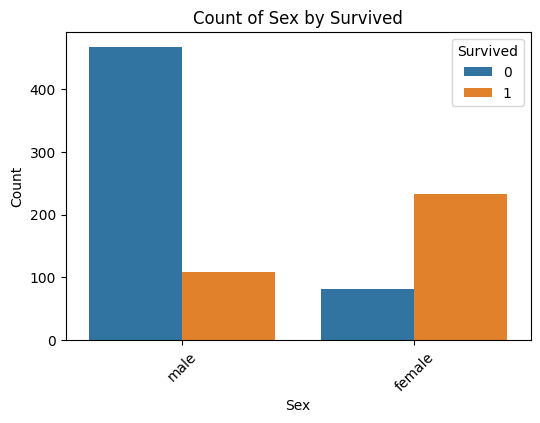

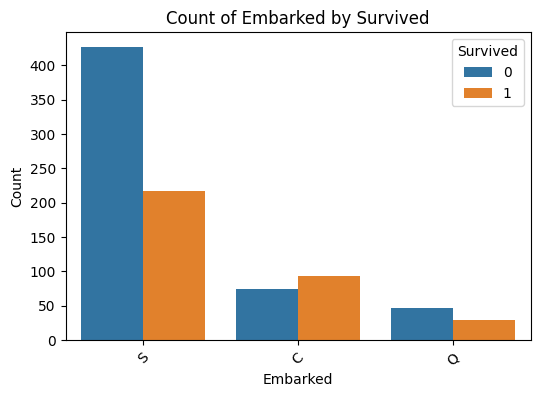

In [12]:
for i in x_train.columns:
    if i not in ['Survived','FamilySize', 'IsAlone', 'Title'] and x_train[i].dtype == 'object':  # for categorical columns
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train, x=i, hue='Survived')
        plt.title(f'Count of {i} by Survived')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [13]:

x_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone','Title']]
print(x_test)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked  FamilySize  \
0         3    male  34.5      0      0    7.8292        Q           1   
1         3  female  47.0      1      0    7.0000        S           2   
2         2    male  62.0      0      0    9.6875        Q           1   
3         3    male  27.0      0      0    8.6625        S           1   
4         3  female  22.0      1      1   12.2875        S           3   
..      ...     ...   ...    ...    ...       ...      ...         ...   
413       3    male   NaN      0      0    8.0500        S           1   
414       1  female  39.0      0      0  108.9000        C           1   
415       3    male  38.5      0      0    7.2500        S           1   
416       3    male   NaN      0      0    8.0500        S           1   
417       3    male   NaN      1      1   22.3583        C           3   

     IsAlone   Title  
0          1      Mr  
1          0     Mrs  
2          1      Mr  
3          1      M

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
# x_train = train.dropna()
# print(x_train)

In [15]:
col = (x_train.dtypes=="object")
obj_cols = list(col[col].index)
print(f"Columns with categorical data = {obj_cols}")

Columns with categorical data = ['Sex', 'Embarked', 'Title']


In [16]:
from sklearn.preprocessing import OrdinalEncoder

num_x_tr = x_train.copy()
num_x_tst = x_test.copy()

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

num_x_tr[obj_cols] =  ord_enc.fit_transform(x_train[obj_cols])
num_x_tst[obj_cols] =  ord_enc.transform(x_test[obj_cols])

print(num_x_tr)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone  \
0         3  1.0  22.0      1      0   7.2500       2.0           2        0   
1         1  0.0  38.0      1      0  71.2833       0.0           2        0   
2         3  0.0  26.0      0      0   7.9250       2.0           1        1   
3         1  0.0  35.0      1      0  53.1000       2.0           2        0   
4         3  1.0  35.0      0      0   8.0500       2.0           1        1   
..      ...  ...   ...    ...    ...      ...       ...         ...      ...   
886       2  1.0  27.0      0      0  13.0000       2.0           1        1   
887       1  0.0  19.0      0      0  30.0000       2.0           1        1   
888       3  0.0   NaN      1      2  23.4500       2.0           4        0   
889       1  1.0  26.0      0      0  30.0000       0.0           1        1   
890       3  1.0  32.0      0      0   7.7500       1.0           1        1   

     Title  
0     12.0  
1     13.0  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [17]:
# num_x_tr['Sex']

In [18]:
num_x_tr.isnull().any()

missing = [i for i in num_x_tr.columns if num_x_tr[i].isnull().any()]
print(f"Columns with missing values = {missing}")

Columns with missing values = ['Age', 'Embarked']


In [19]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy='median')
imp_x_train = pd.DataFrame(my_imputer.fit_transform(num_x_tr))
imp_x_test = pd.DataFrame(my_imputer.fit_transform(num_x_tst))

imp_x_train.columns = x_train.columns
imp_x_test.columns = x_test.columns



In [20]:
for col in imp_x_train.select_dtypes(include='float'):
    
    if col not in ['Age','Fare'] and (imp_x_train[col] % 1 == 0).all():
        print(col)
        imp_x_train[col] = imp_x_train[col].astype(int)
        imp_x_test[col] = imp_x_test[col].astype(int)


Pclass
Sex
SibSp
Parch
Embarked
FamilySize
IsAlone
Title


In [21]:
print(imp_x_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  FamilySize  IsAlone  \
0         3    1  34.5      0      0    7.8292         1           1        1   
1         3    0  47.0      1      0    7.0000         2           2        0   
2         2    1  62.0      0      0    9.6875         1           1        1   
3         3    1  27.0      0      0    8.6625         2           1        1   
4         3    0  22.0      1      1   12.2875         2           3        0   
..      ...  ...   ...    ...    ...       ...       ...         ...      ...   
413       3    1  27.0      0      0    8.0500         2           1        1   
414       1    0  39.0      0      0  108.9000         0           1        1   
415       3    1  38.5      0      0    7.2500         2           1        1   
416       3    1  27.0      0      0    8.0500         2           1        1   
417       3    1  27.0      1      1   22.3583         0           3        0   

     Title  
0       12  
1

In [22]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(imp_x_train,y_train,random_state=2,train_size=0.85)

In [23]:
trainX.shape

(757, 10)

In [24]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=95,max_depth=6, random_state=1)
# model.fit(num_x_tr,y_train)

In [25]:
# from xgboost import XGBClassifier
# model = XGBClassifier(n_estimators=310, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss')
# model.fit(trainX, trainY)

In [26]:
# --- Imports ---
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# All models including stacking
models = {
    'LogisticRegression': LogisticRegression(
        max_iter=1000, random_state=2
    ),
    'RidgeClassifier': RidgeClassifier(random_state=2),
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=2
    ),
    'XGBoost': XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8,
        colsample_bytree=0.8, random_state=2, n_jobs=-1, use_label_encoder=False, eval_metric="logloss"
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=-1, subsample=0.8,
        colsample_bytree=0.8, random_state=2, n_jobs=-1
    ),
    'CatBoost': CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, random_state=2, verbose=0
    ),
    
    'RandomForest': RandomForestClassifier(
        n_estimators=800, max_depth=30, min_samples_split=5, min_samples_leaf=2,
        max_features='sqrt', bootstrap=True, random_state=2, n_jobs=-1
    )
}

# --- Evaluation Loop ---
results = {}
for name, model in models.items():
    model.fit(trainX, trainY)
    pred = model.predict(testX)

    acc = accuracy_score(testY, pred)
    prec = precision_score(testY, pred, average="weighted", zero_division=0)
    rec = recall_score(testY, pred, average="weighted", zero_division=0)
    f1 = f1_score(testY, pred, average="weighted", zero_division=0)

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}
    print(f"\n{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")



LogisticRegression - Accuracy: 0.7836, Precision: 0.7931, Recall: 0.7836, F1: 0.7777

RidgeClassifier - Accuracy: 0.7761, Precision: 0.7834, Recall: 0.7761, F1: 0.7706

GradientBoosting - Accuracy: 0.7985, Precision: 0.8008, Recall: 0.7985, F1: 0.7959

XGBoost - Accuracy: 0.8209, Precision: 0.8280, Recall: 0.8209, F1: 0.8174
[LightGBM] [Info] Number of positive: 283, number of negative: 474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373844 -> initscore=-0.515760
[LightGBM] [Info] Start training from score -0.515760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [27]:
weights = {"Accuracy": 0.25, "Precision": 0.25, "Recall": 0.25, "F1": 0.25}
composite_scores = {
    model: sum(results[model][metric] * weights[metric] for metric in weights)
    for model in results
}

In [28]:
best_model_name = max(composite_scores, key=composite_scores.get)
print(f"\nBest model: {best_model_name} with composite score {composite_scores[best_model_name]:.4f}")



Best model: RandomForest with composite score 0.8370


In [29]:
model = models[best_model_name]

In [30]:
import joblib

# Save models
# for name, model in models.items():
filename = f"/kaggle/working/{best_model_name}_model.pkl"
joblib.dump(model, filename)
print(f"✅ Saved {name} to {filename}")

✅ Saved RandomForest to /kaggle/working/RandomForest_model.pkl


In [31]:
# from sklearn.metrics import mean_absolute_error

# # Predict on training data
# train_preds = model.predict(testX)


# from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

# # Training accuracy
# print("Training Accuracy:", accuracy_score(testY, train_preds))

# # MAE (mean absolute error) — just for consistency with your previous code
# print("Training MAE:", mean_absolute_error(testY, train_preds))

# # Confusion Matrix
# print("Confusion Matrix:\n", confusion_matrix(testY, train_preds))

# # Classification Report
# print("Classification Report:\n", classification_report(testY, train_preds))


In [32]:
pred = model.predict(imp_x_test)


In [33]:
print(pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [34]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': test['PassengerId'].astype(int),
                       'Survived': (pred)})
output.to_csv('submission.csv', index=False)

In [35]:
df = pd.read_csv("submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
